# Predicting House Prices

In the following challenge we will decompose the problem into many steps in which we will:
* **Explore the dataset:** we'll try to find the variables that most influence the SalePrice variable 
* **Cleaning the Dataset:** in particular we will deal with missing data  and outliers
* **Building the statical model:** in this part we will build our predicting model 
* **Improving our model:** After Building our model we will focus on this part on improving the prediction accuracy on the validation data
* **Predicting SalePrice and Submission**: Final prediction of the SalePrice on the test data and submission of the results


# 1. Explore the dataset

<div class="alert alert-info">First We will import the necessary libararies that we will use in the challenge </div>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#Load the training data as pandas dataframe
trainDF = pd.DataFrame.from_csv('train.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [3]:
#get an overview of how the data looks
trainDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<div class="alert alert-info">From the first glance at our data we can see that we have many missing data (NaN values) but we will deal with that later.
We can see that we have 79 vairiables plus the output variable that we will build our model to predict it.
Let's see now how the variables look like that is what are their datatypes.
</div>


In [4]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 1200
Data columns (total 80 columns):
MSSubClass       1200 non-null int64
MSZoning         1200 non-null object
LotFrontage      990 non-null float64
LotArea          1200 non-null int64
Street           1200 non-null object
Alley            75 non-null object
LotShape         1200 non-null object
LandContour      1200 non-null object
Utilities        1200 non-null object
LotConfig        1200 non-null object
LandSlope        1200 non-null object
Neighborhood     1200 non-null object
Condition1       1200 non-null object
Condition2       1200 non-null object
BldgType         1200 non-null object
HouseStyle       1200 non-null object
OverallQual      1200 non-null int64
OverallCond      1200 non-null int64
YearBuilt        1200 non-null int64
YearRemodAdd     1200 non-null int64
RoofStyle        1200 non-null object
RoofMatl         1200 non-null object
Exterior1st      1200 non-null object
Exterior2nd      1200 non-n

<div class="alert alert-info"> So we can see that we have 2 types of variables: integer and objects (that is categorical variables), so we have to deal with these variables seperately.
Now let's see some simple statstics on the 'SalePrice' variable.
</div> 

## 1.a. Analysing 'SalePrice'

In [5]:
trainDF['SalePrice'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<div class="alert alert-info">
With describe function we now have a clear description about the Sale Price that we will predict. We don't have missing values (1200) nor a null-value or negative values.
Now let's see how does the distribution of SalePrice varibale looks like.
</div>

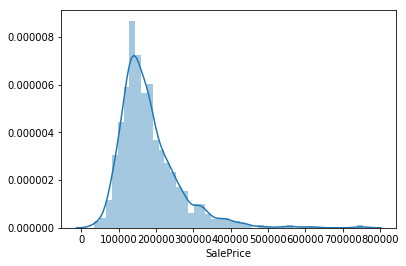

In [6]:
#See the shape of the distribution of SalePrice
sns.distplot(trainDF['SalePrice']);

<div class="alert alert-info">We can see that the distribution of the output variable doesn't look like normal distribution so we have to take this into account when chosing the training algorithm used and building our model. We will explore this further later. 
</div>

## 1.b. Exploring Numerical Data

<div class="alert alert-info">Now we will explore the numerical variables and study their relationship between each other and  their influence on the output variable and finally we will try to have a first pick of the variables that we will use for the training algorithm and those that we will discard.</div>

<div class="alert alert-info">First we will get the columns that have numerical datatype and store it in a list</div>

In [7]:
#Get the numercial Feautures
numericColumns=trainDF.select_dtypes(include=[np.number]).columns.tolist()
print('we have ',len(numericColumns),' numeric columns')



we have  37  numeric columns


<div class="alert alert-info">Now we will plot the scatter plot of each variable vs the SalePrice variable and we will have a first look of the variables that are most related to the SalePrice.</div>

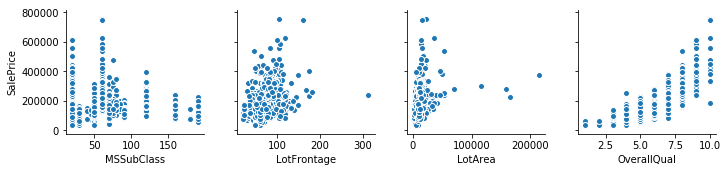

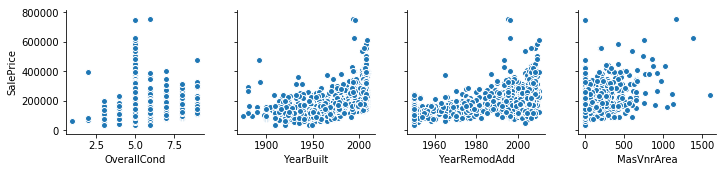

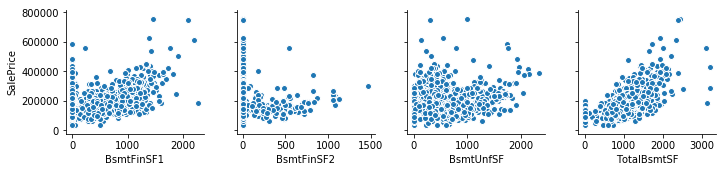

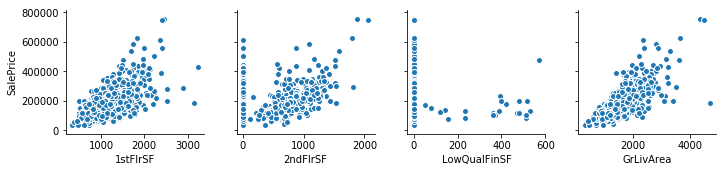

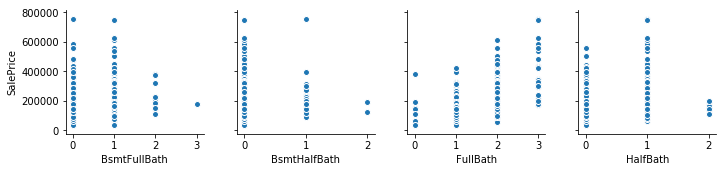

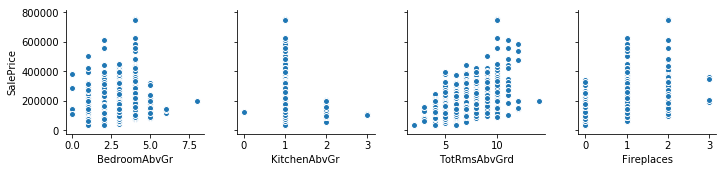

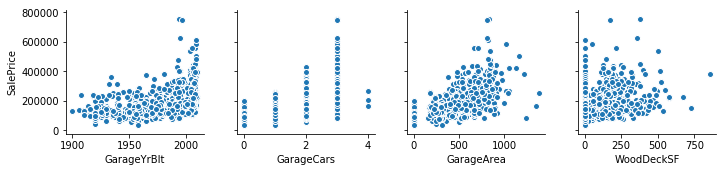

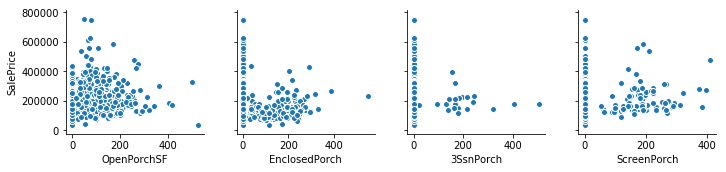

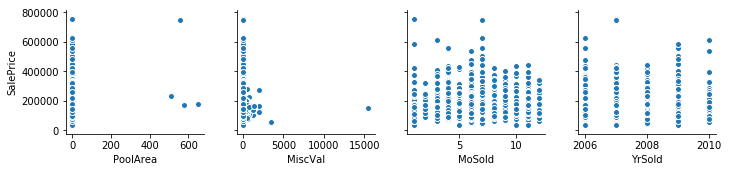

In [8]:
#Show the Pairplot of all numerical data vs the SalePrice
for i in range(0,36,4):
    sns.pairplot(trainDF,x_vars=numericColumns[i:i+4],y_vars=['SalePrice'])

<div class="alert alert-info">
<ul>
<li> First we realize that the numerical variables are also split into two types: continous and discrete variables that resmble categorical variables.
<li> We can see that there are many variables won't have a huge effect on SalePrice and others that clearly have an effect but we will study this in more detail using statistical tests.
</ul>

</div>

<div class="alert alert-info">
Now we will plot the variables that we think have most influence on our data according to the scatter plots obtained above.
</div>

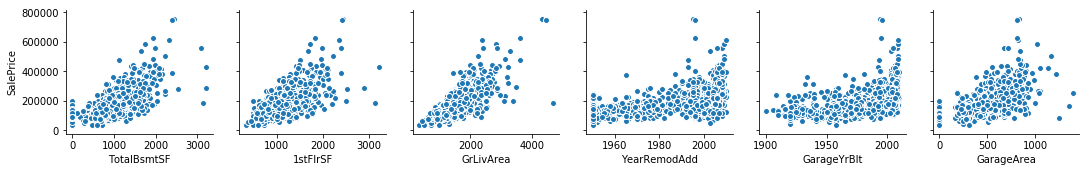

In [9]:
#Plot the Feautures that look that have the most influence on SalePrice
Features =['TotalBsmtSF','1stFlrSF','GrLivArea','YearRemodAdd','GarageYrBlt','GarageArea']
sns.pairplot(trainDF,x_vars=Features,y_vars=['SalePrice'])

<div class="alert alert-info">
<ul>
<li>We can see that see that these variables have some kind of relationship with the SalePrice output but we can't be sure which the are the most important ones.Furthermore, these variables can be related to each other which will add redundancy to our data and would affect the accuracy of our model.    
<li>These variables that we selected aren't the only ones related to our model there are also the discrete numerical data let's plot now the box plot of some of them and see how they are related to the output.
<ul>
</div>


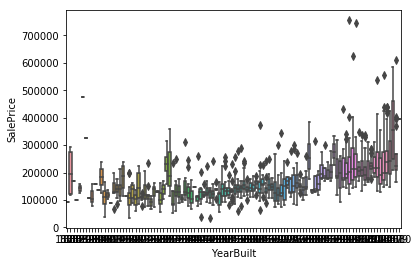

In [10]:
#Visulaize how SalePrice vary with YearBuilt
sns.boxplot(x='YearBuilt', y="SalePrice", data=trainDF);


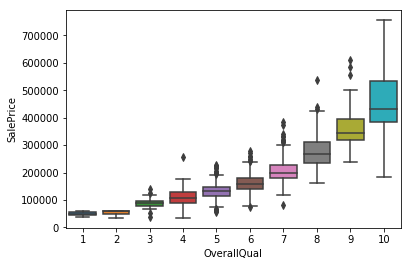

In [11]:
#Visulaize how SalePrice vary with OverallQual
sns.boxplot(x='OverallQual', y="SalePrice", data=trainDF);

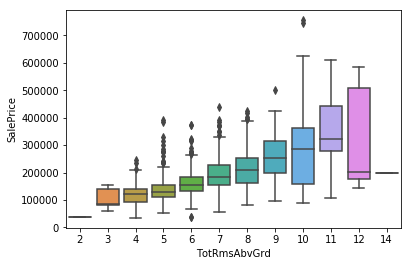

In [12]:
#Visulaize how SalePrice vary with TotRmsAbvGrd
sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=trainDF);

<div class="alert alert-info">
We can see that these variables are also related to the output in some way. Now we will calculate the correlations between the numerical variables and the output.  
</div>

In [13]:
#Get the coorelation of all Feautures with SalePrice
SalePriceCorr=trainDF.corr()['SalePrice']
HighlyCorrelatedWithSalePrice=SalePriceCorr[(SalePriceCorr>0.5) | (SalePriceCorr<-0.5)].sort_values(ascending=False)


In [14]:
HighlyCorrelatedWithSalePrice

SalePrice       1.000000
OverallQual     0.789142
GrLivArea       0.740379
TotalBsmtSF     0.641917
GarageCars      0.640961
GarageArea      0.623329
1stFlrSF        0.618556
FullBath        0.571867
TotRmsAbvGrd    0.559435
YearBuilt       0.523194
YearRemodAdd    0.509916
Name: SalePrice, dtype: float64

<div class="alert alert-info">
<ul>
<li>Above we can see the highly correlated variables with the output (abs(correlation)>0.5) and the results are logical in which these are the discriptions we look for when purchasing a house (condition,yearbuiltm,area,..).
    
<li>But obviously there are variables correlated with each other (GarageArea and GarageCars) if we got rid of one of them and kept the highly correlated variable this will reduce the redundancy of our data so now we will see which variables from this list are highly correlated with each other.
    
</div>

In [15]:
CorrDF=trainDF.corr()

In [16]:
#Get All the Feautures that are highly coorelated with each other
correlatedFeaturs=[]
for columns in CorrDF:
    ColmnCorr=CorrDF[columns]
    Series=ColmnCorr[((ColmnCorr>0.8) | (ColmnCorr>0.8)) & (ColmnCorr<0.999)]
    if( len(Series.index)>0):
        print(Series.name,end=' ')
    for i, row in Series.iteritems():
        print("-----highly correlated with-----",i)
        correlatedFeaturs.append((Series.name,i))

YearBuilt -----highly correlated with----- GarageYrBlt
TotalBsmtSF -----highly correlated with----- 1stFlrSF
1stFlrSF -----highly correlated with----- TotalBsmtSF
GrLivArea -----highly correlated with----- TotRmsAbvGrd
TotRmsAbvGrd -----highly correlated with----- GrLivArea
GarageYrBlt -----highly correlated with----- YearBuilt
GarageCars -----highly correlated with----- GarageArea
GarageArea -----highly correlated with----- GarageCars


<div class="alert alert-info">
Now that we have the list of variables that are related to each other if they both are in the list "HighlyCorrelatedWithSalePrice" we will remove one of them and keep the variable with higher correlation.
</div>

In [17]:
#Determine which Features that are highly correlated with each other that both influence the SalePrice and 
#keep the highly coorelated one
for cupple in correlatedFeaturs:
    if (cupple[0] in HighlyCorrelatedWithSalePrice and cupple[1] in HighlyCorrelatedWithSalePrice):
        if(HighlyCorrelatedWithSalePrice[cupple[0]]>HighlyCorrelatedWithSalePrice[cupple[1]]):
            HighlyCorrelatedWithSalePrice.drop(labels=cupple[1],inplace=True)
        else:
            HighlyCorrelatedWithSalePrice.drop(labels=cupple[0],inplace=True)            
print(HighlyCorrelatedWithSalePrice)      


SalePrice       1.000000
OverallQual     0.789142
GrLivArea       0.740379
TotalBsmtSF     0.641917
GarageCars      0.640961
FullBath        0.571867
YearBuilt       0.523194
YearRemodAdd    0.509916
Name: SalePrice, dtype: float64


<div class="alert alert-info">
Now we have the most correlated independent variables with the output. But we don't think this study is enough so we will try other methods to see if we get different results. Before moving on to a different method we will standardize our data then perform the same test and see if we obtain different results since variables have differnt units it is not fair to compare the correlation without having the same units.
</div>

In [18]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
trainNumericalDF=trainDF.select_dtypes(include=[np.number]).fillna(trainDF.mean())
ScaledTrainDF=scaler.fit_transform(trainNumericalDF)
ScaledTrainDF=pd.DataFrame(ScaledTrainDF, index=trainNumericalDF.index, columns=trainNumericalDF.columns)
ScaledTrainDF.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.150685,0.033420,0.666667,0.500,0.948148,0.883333,0.12250,0.312389,0.0,...,0.000000,0.116635,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
2,0.000000,0.202055,0.038795,0.555556,0.875,0.748148,0.433333,0.00000,0.432743,0.0,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
3,0.235294,0.160959,0.046507,0.666667,0.500,0.933333,0.866667,0.10125,0.215044,0.0,...,0.000000,0.080306,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
4,0.294118,0.133562,0.038561,0.666667,0.500,0.296296,0.333333,0.00000,0.095575,0.0,...,0.000000,0.066922,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
5,0.235294,0.215753,0.060576,0.777778,0.500,0.925926,0.833333,0.21875,0.289823,0.0,...,0.224037,0.160612,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [19]:
#Get the coorelation of all Feautures with SalePrice
SalePriceCorr=ScaledTrainDF.corr()['SalePrice']
HighlyCorrelatedWithSalePrice=SalePriceCorr[(SalePriceCorr>0.5) | (SalePriceCorr<-0.5)].sort_values(ascending=False)
print(HighlyCorrelatedWithSalePrice)
CorrDF=ScaledTrainDF.corr()
#Get All the Feautures that are highly coorelated with each other
correlatedFeaturs=[]
for columns in CorrDF:
    ColmnCorr=CorrDF[columns]
    Series=ColmnCorr[((ColmnCorr>0.8) | (ColmnCorr>0.8)) & (ColmnCorr<0.999)]
    if( len(Series.index)>0):
        print("Series name: ",Series.name,end=', ')
    for i, row in Series.iteritems():
        print("Highly Correlated With:",i)
        correlatedFeaturs.append((Series.name,i))
#Determine which Features that are highly correlated with each other that both influence the SalePrice and 
#keep the highly coorelated one
for cupple in correlatedFeaturs:
    if (cupple[0] in HighlyCorrelatedWithSalePrice and cupple[1] in HighlyCorrelatedWithSalePrice):
        if(HighlyCorrelatedWithSalePrice[cupple[0]]>HighlyCorrelatedWithSalePrice[cupple[1]]):
            HighlyCorrelatedWithSalePrice.drop(labels=cupple[1],inplace=True)
        else:
            HighlyCorrelatedWithSalePrice.drop(labels=cupple[0],inplace=True)            
print(HighlyCorrelatedWithSalePrice)        

SalePrice       1.000000
OverallQual     0.789142
GrLivArea       0.740379
TotalBsmtSF     0.641917
GarageCars      0.640961
GarageArea      0.623329
1stFlrSF        0.618556
FullBath        0.571867
TotRmsAbvGrd    0.559435
YearBuilt       0.523194
YearRemodAdd    0.509916
Name: SalePrice, dtype: float64
Series name:  TotalBsmtSF, Highly Correlated With: 1stFlrSF
Series name:  1stFlrSF, Highly Correlated With: TotalBsmtSF
Series name:  GrLivArea, Highly Correlated With: TotRmsAbvGrd
Series name:  TotRmsAbvGrd, Highly Correlated With: GrLivArea
Series name:  GarageCars, Highly Correlated With: GarageArea
Series name:  GarageArea, Highly Correlated With: GarageCars
SalePrice       1.000000
OverallQual     0.789142
GrLivArea       0.740379
TotalBsmtSF     0.641917
GarageCars      0.640961
FullBath        0.571867
YearBuilt       0.523194
YearRemodAdd    0.509916
Name: SalePrice, dtype: float64


<div class="alert alert-info">
Now that we are sure that we obtain the same results we can move on to other methods.

</div>

<div class="alert alert-info">
First we will use logistic regression and use it to extract the 5 most variables that influence the output.
</div>

In [20]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

array = trainDF.select_dtypes(include=[np.number]).fillna(trainDF.mean())

X = array.iloc[:,:36]
Y = array.iloc[:,36]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: ",fit.n_features_) 
print("List of Feautures",fit.support_)
print("Feature Ranking: ",fit.ranking_) 

Num Features:  5
List of Feautures [False False False  True  True False False False False False False False
 False False False False  True False False False False False  True  True
 False False False False False False False False False False False False]
Feature Ranking:  [12 14 32  1  1 10  8 17 18 22 21 27 20 25 29 24  1  7  3  2  4 11  1  1
 13  5 26 19 15 16 28 23 31 30  6  9]


In [21]:
indexes=np.where(fit.support_==True)[0]      
indexes

array([ 3,  4, 16, 22, 23])

In [22]:
trainDF.columns[indexes]

Index(['LotArea', 'Street', 'OverallQual', 'Exterior1st', 'Exterior2nd'], dtype='object')

<div class="alert alert-info">
We can see that we obtained a different resut here than before where some of these variables didn't even make the list of most correlated variables.
</div>

<div class="alert alert-info">
Now we will try Feature Extraction with Univariate Statistical Tests.
</div>

In [23]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = array.iloc[:,:36]
Y = array.iloc[:,36]

# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.803e+04 4.498e+03 1.045e+07 3.166e+02 1.393e+02 3.751e+02 1.610e+02
 2.551e+05 3.479e+05 3.251e+05 2.451e+05 1.484e+05 1.044e+05 4.205e+05
 2.230e+05 1.706e+05 4.114e+02 5.455e+02 1.708e+02 4.682e+02 1.557e+02
 2.581e+01 3.166e+02 4.760e+02 2.183e+02 2.742e+02 8.169e+04 1.027e+05
 6.502e+04 9.605e+04 1.738e+05 1.169e+05 2.739e+05 6.596e+06 6.793e+02
 5.326e-01]
[[ 8450.   706.     0.   854.     0.]
 [ 9600.   978.     0.     0.     0.]
 [11250.   486.     0.   866.     0.]
 [ 9550.   216.     0.   756.     0.]
 [14260.   655.     0.  1053.     0.]]


In [24]:
scores=sorted(fit.scores_)
indexes=[np.where(fit.scores_==score)[0][0] for score in scores]


In [25]:
trainDF.columns[indexes[0:5]]

Index(['BsmtFinSF2', 'RoofMatl', 'Street', 'RoofStyle', 'LotShape'], dtype='object')

<div class="alert alert-info">
Also here we obtained different result from the previous two.
</div>

<div class="alert alert-info">
Now we will try Feature Importance with Extra Trees Classifier.
</div>

In [26]:

# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
X = array.iloc[:,:36]
Y=array.iloc[:,36]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.025 0.044 0.045 0.034 0.028 0.041 0.043 0.031 0.039 0.013 0.047 0.045
 0.05  0.026 0.002 0.046 0.02  0.007 0.016 0.015 0.025 0.003 0.034 0.028
 0.041 0.017 0.047 0.036 0.034 0.015 0.004 0.01  0.001 0.006 0.045 0.042]


In [27]:
scores=sorted(model.feature_importances_,reverse=True)
indexes=[np.where(model.feature_importances_==score)[0][0] for score in scores]

In [28]:
trainDF.columns[indexes[0:5]]

Index(['Condition1', 'LandSlope', 'ExterQual', 'HouseStyle', 'Neighborhood'], dtype='object')

<div class="alert alert-info">
So we can see that each test yielded different results now we will see if there is any common variables selected from these tests.
</div>

In [29]:
from collections import Counter
ListLogisticRegression=['LotArea', 'Street', 'OverallQual', 'Exterior1st', 'Exterior2nd']
ListFeautureExtraction=['LotFrontage', 'Condition1', 'BsmtFinType2', 'ExterQual', 'HouseStyle']
ListTrees=['BsmtFinSF2', 'RoofMatl', 'Street', 'RoofStyle', 'LotShape']
ListCovariance=['OverallQual','GrLivArea' ,'TotalBsmtSF','GarageCars','FullBath','YearBuilt','YearRemodAdd']
AllLists=ListLogisticRegression+ListFeautureExtraction+ListTrees+ListCovariance
Dict=Counter(AllLists) 
DoubledList=[]
for key, value in Dict.items():
    if value>1:
        DoubledList.append(key)
print("The variables that have more than one occurance are:",DoubledList)        
     
    

The variables that have more than one occurance are: ['Street', 'OverallQual']


<div class="alert alert-info">
So we can see that only 2 variables were selected by more than one test which will make our work harder since we will have to try the differnt combinations of variables in training the model and see which will yield the best prediction accuracy on the validation data.
</div>

## 1.b. Exploring Categorical Varibales

<div class="alert alert-info">In this part we will repeat what we have done on the numerical data on the categorical data.</div>

<div class="alert alert-info">
First we will put the categorical variables in a list.
</div>

In [30]:
categoricalCols=[col for col in trainDF.columns if col not in numericColumns]


trainDF[categoricalCols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<div class="alert alert-info">
We can see that we have 43 categorical variables. Some of these variables have "NA" as a value according to the file Data desicription but it seems they have instead NaN representing the "NA" value (for example Alley has "NA" value which means No alley access) but keeping "NA" as NaN will cause problems as many functions that work on pandas dataframe will treat these values as missing ones so we will check if "NA" is represented by NaN.
</div>

<div class="alert alert-info">
We will check this case on the Alley variable.
</div>

In [31]:
print(trainDF[trainDF['Alley']=='NA']['Alley'])


Series([], Name: Alley, dtype: object)


<div class="alert alert-info">As seen above there are no 'NA' values for the Alley variable instead we have NaN so we will replace NaN with 'NA'.
</div>

In [32]:
trainDFCategories=trainDF[categoricalCols+['SalePrice']].fillna('NA')
trainDFCategories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,208500
2,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,181500
3,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,223500
4,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml,140000
5,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,250000


<div class="alert alert-info">So now all NaN are replaced by 'NA'. Next we will plot all the categorical variables vs the output variables and try to see how these variables influence the output.</div>

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


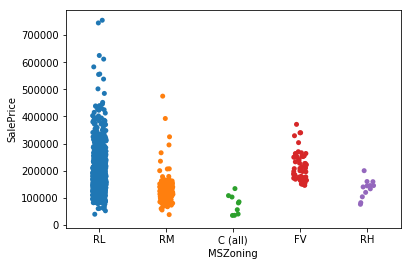

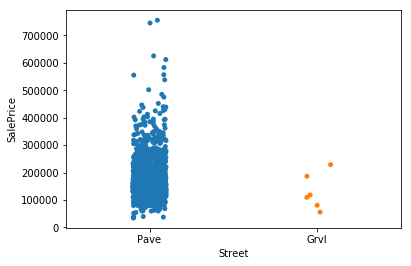

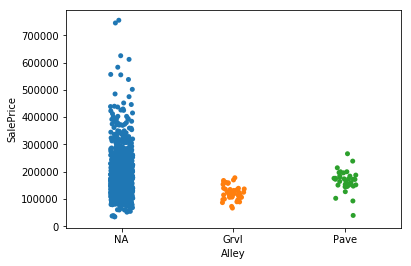

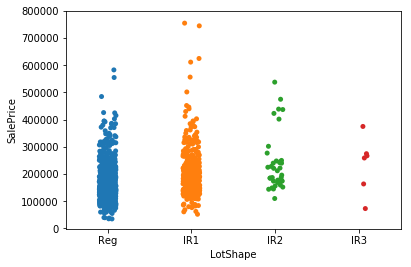

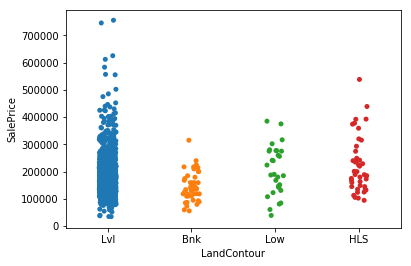

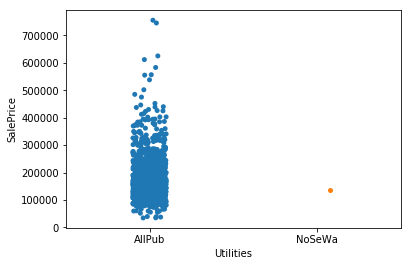

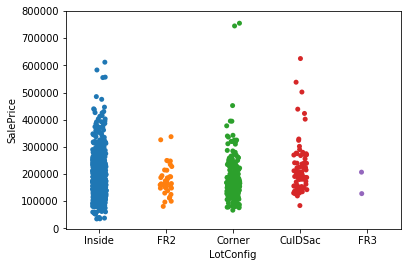

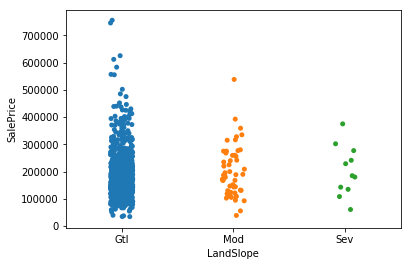

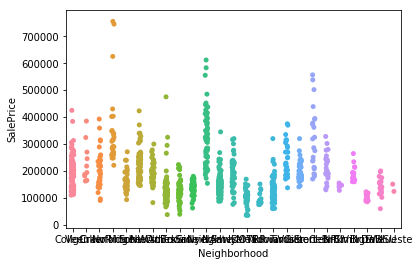

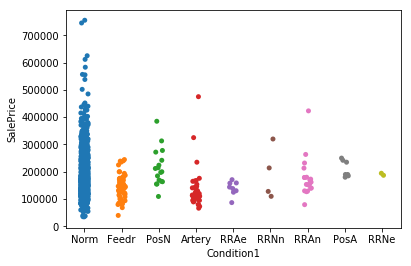

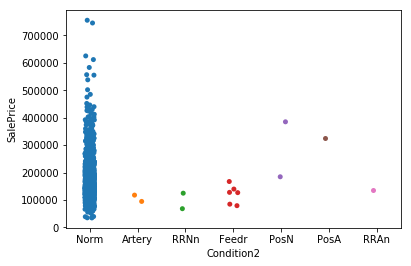

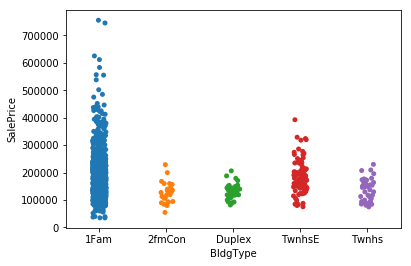

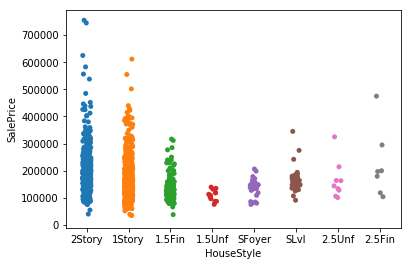

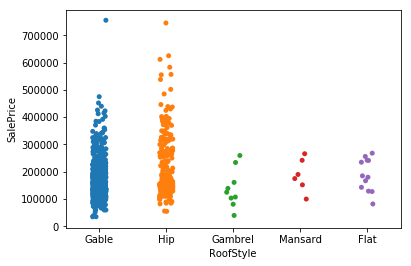

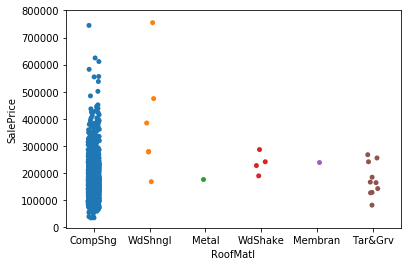

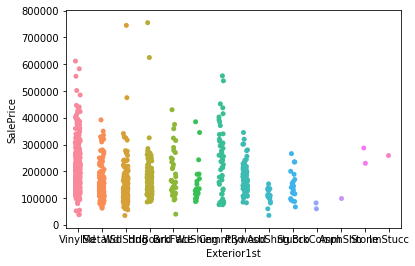

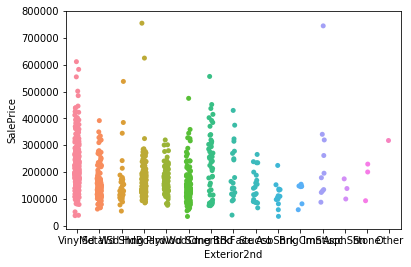

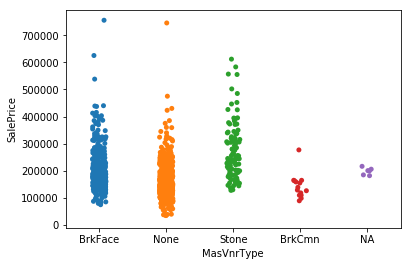

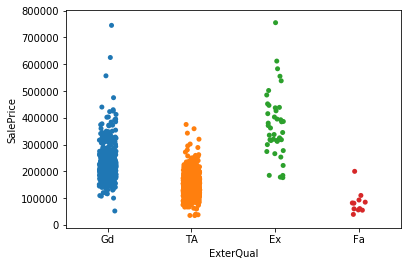

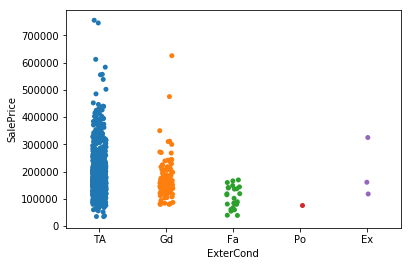

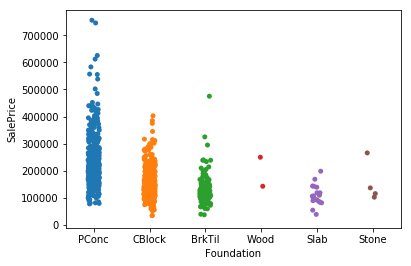

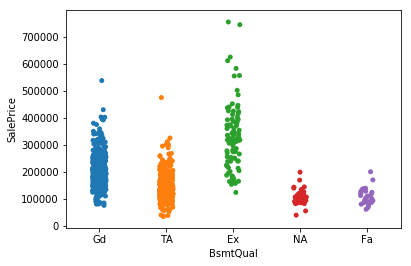

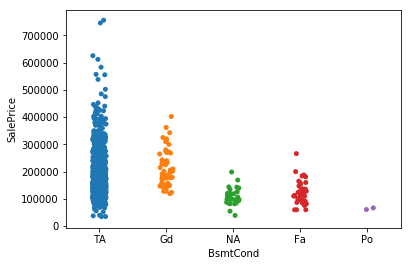

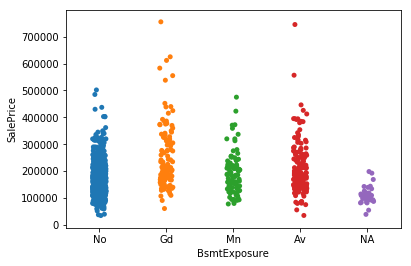

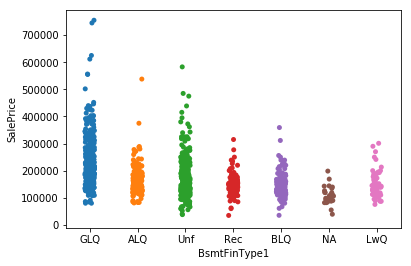

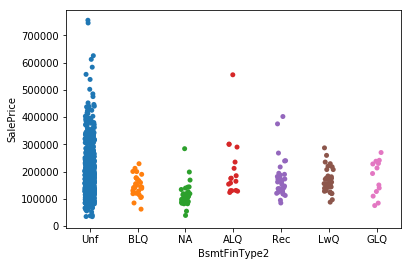

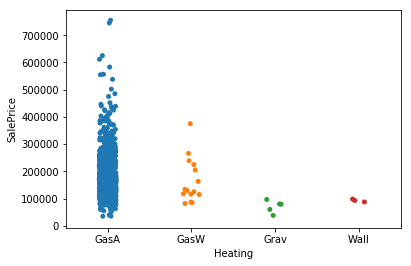

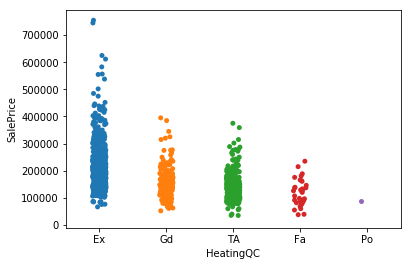

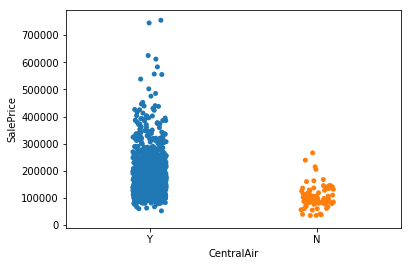

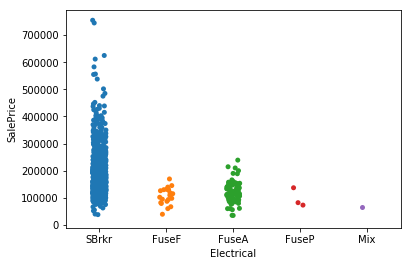

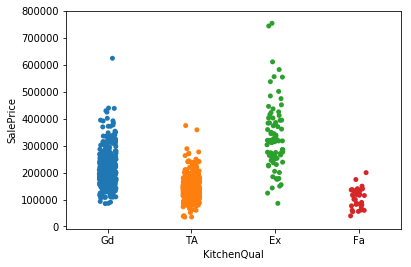

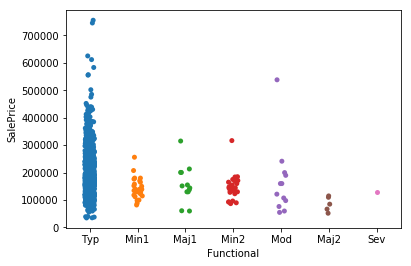

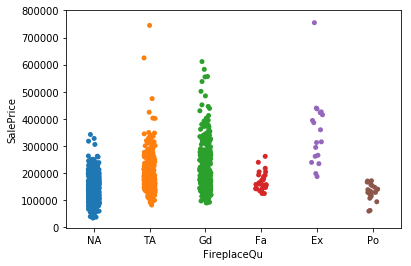

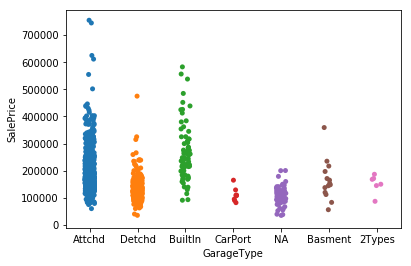

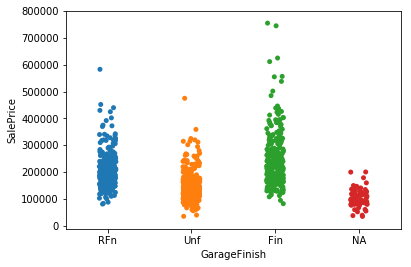

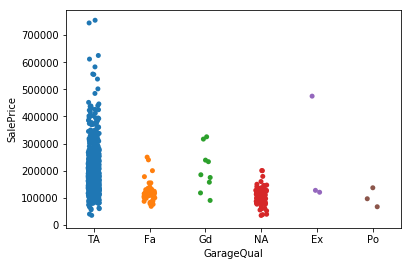

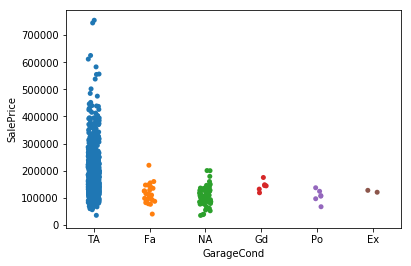

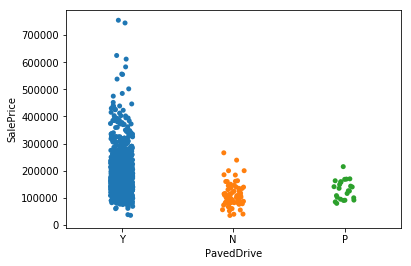

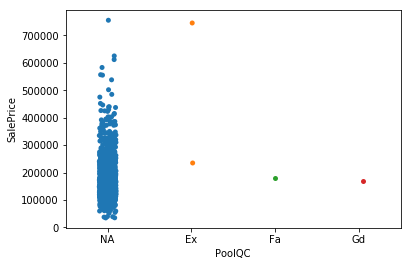

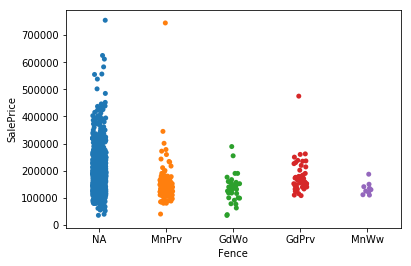

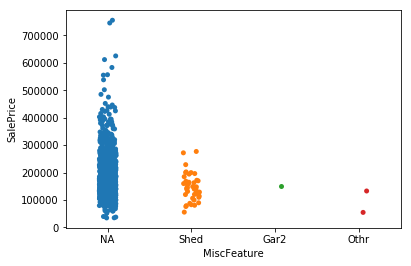

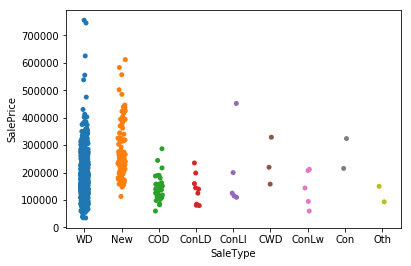

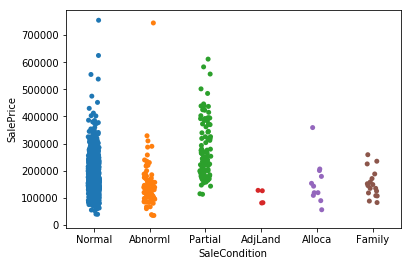

In [33]:
#get categorical column names
for col in categoricalCols:
    sns.stripplot(x=col, y="SalePrice", data=trainDFCategories, jitter=True);
    plt.figure()

<div class="alert alert-info">
<ul>
<li>An important observation can be made from this plot and that's alot of variables have a dominant category over the others for example the Alley variable has most of its values equal to "NA" and utilities have all of its data except few as "AllPub" same for Street. So these variables are not useful in the training and it is better to eliminate them.
<li>As for which variables influence the output the most it is hard to determine from just observing these plots so we will use the techniques we used before on these variables and see the most important ones.</div>


<div class="alert alert-info">Now we will transform these variables to numerical data so we can use the previous techniques on them.</div> 

In [34]:
arrayCat = trainDFCategories.iloc[:,:43].apply(lambda x: x.astype('category').cat.codes)
arrayCat.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
4,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
5,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


<div class="alert alert-info">Now we will use logistic regression to extract the most important features from our data.</div>

In [35]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(arrayCat,trainDFCategories['SalePrice'])
print("Num Features: ",fit.n_features_)  
print("Selected Features: ",fit.support_) 
print("Feature Ranking: ",fit.ranking_)

Num Features:  5
Selected Features:  [ True False False False False False False False False False False False
 False  True False False False False False False  True False False False
 False False False False False False False False  True False False False
 False False  True False False False False]
Feature Ranking:  [ 1 38 32  5 17 39 16 34 30 14 31 15 10  1 36 33 27  2 18 11  1  3 21  9
 12 25 37  8 35 23 13 28  1  7  4  6 22 26  1 20 19 29 24]


In [36]:
indexes=np.where(fit.support_==True)[0]      
trainDFCategories.columns[indexes]


Index(['MSZoning', 'RoofStyle', 'Foundation', 'FireplaceQu', 'PoolQC'], dtype='object')

<div class="alert alert-info">Now we will extract the most important features using Extra Trees Classifier.</div>

In [37]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(arrayCat,trainDFCategories['SalePrice'])
print(model.feature_importances_)
scores=sorted(model.feature_importances_,reverse=True)
indexes=[np.where(model.feature_importances_==score)[0][0] for score in scores]
trainDFCategories.columns[indexes[0:5]]

[0.022 0.001 0.009 0.028 0.015 0.    0.036 0.008 0.066 0.021 0.002 0.024
 0.044 0.027 0.003 0.049 0.046 0.042 0.02  0.021 0.027 0.027 0.016 0.04
 0.06  0.023 0.002 0.039 0.006 0.008 0.03  0.011 0.057 0.025 0.039 0.009
 0.007 0.008 0.    0.029 0.008 0.019 0.025]


Index(['Neighborhood', 'BsmtFinType1', 'FireplaceQu', 'Exterior1st',
       'Exterior2nd'],
      dtype='object')

<div class="alert alert-info">Feature Extraction with Univariate Statistical Tests (Chi-squared for classification).</div>

In [38]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(arrayCat,trainDFCategories['SalePrice'])
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(arrayCat)
# summarize selected features
print(features[0:5,:])
scores=sorted(fit.scores_)
indexes=[np.where(fit.scores_==score)[0][0] for score in scores]
trainDFCategories.columns[indexes[0:5]]

[ 100.863    3.655   33.835  708.407  108.123  239.     501.895  851.5
 1963.961  193.951   18.987 1727.413  720.572  307.283 2516.057  626.932
  729.935  293.598  179.091   83.634  250.207  502.447  144.997  568.367
  930.39   154.291 1263.689 1304.409   45.039  188.607  252.46    94.155
  284.754 1093.475  570.112  104.702   72.315   77.958    3.937  177.616
   77.714  189.661  190.945]
[[ 5  0  0  0  0]
 [24  0  0  0  0]
 [ 5  0  0  0  0]
 [ 6  0  0  0  2]
 [15  0  0  0  0]]


Index(['Street', 'PoolQC', 'Condition2', 'Alley', 'CentralAir'], dtype='object')

<div class="alert alert-info">As before the tests yielded different results so now we will see the common variables of at least 2 tests.</div>

In [39]:
from collections import Counter
List1=['MSZoning', 'RoofStyle', 'Foundation', 'FireplaceQu', 'PoolQC']
List2=['Neighborhood', 'BsmtFinType1', 'FireplaceQu', 'Exterior1st','BsmtExposure']
List3=['Street', 'PoolQC', 'Condition2', 'Alley', 'CentralAir']
AllLists=List1+List2+List3+List3
Dict=Counter(AllLists) 
DoubledList=[]
for key, value in Dict.items():
    if value>1:
        DoubledList.append(key)
print("The variables that have more than one occurance are:",DoubledList) 

The variables that have more than one occurance are: ['FireplaceQu', 'PoolQC', 'Street', 'Condition2', 'Alley', 'CentralAir']


# 2. Data Cleaning

<div class="alert alert-info">
We have explored in the previous part what are the most important variables but we didn't address the problem of missing data and imbalanced categories in the categorical variables. So in this part we will take a look at these problems.</div>

<div class="alert alert-info">Now we will see what if the output distribution is normal.</div>

In [2]:
trainDF = pd.DataFrame.from_csv('train.csv')
testDF = pd.DataFrame.from_csv('test.csv')
numericColumns=trainDF.select_dtypes(include=[np.number]).columns.tolist() 
categoricalCols=[col for col in trainDF.columns if col not in numericColumns]
numericColumns_test=testDF.select_dtypes(include=[np.number]).columns.tolist() 
categoricalCols_test=[col for col in testDF.columns if col not in numericColumns_test]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


## 2.a. logarithmic SalePrice

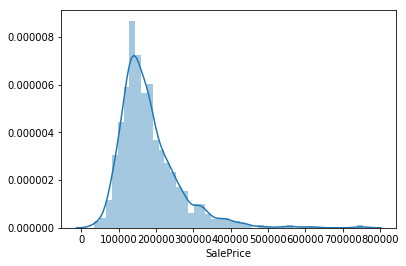

In [3]:
#See the shape of the distribution of SalePrice
sns.distplot(trainDF['SalePrice']);
#trainDF["SalePrice"] = np.log1p(trainDF["SalePrice"])

<div class="alert alert-info">We can see clearly that the output doesn't have a normal distribution it shows positive skewness so let's try to do a simple log transofrmation and see if it will resmble a normal distribution.</div>

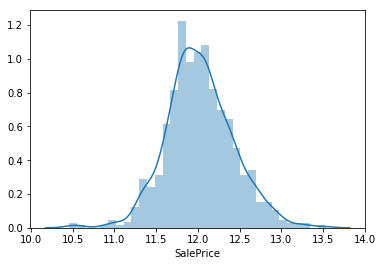

In [4]:
sns.distplot(np.log1p(trainDF["SalePrice"]))
trainDF["SalePrice"] = np.log1p(trainDF["SalePrice"])


<div class="alert alert-info">So after the log transformation the output seem to follow a normal distribution which will improve the training accuracy.</div>

<div class="alert alert-info">Now we will see if we are having outliers for in numerical data.</div>

## 2.b. Outliers : 

For outliers, we are choosing to check for feature having odd values, regarding their linear distribution

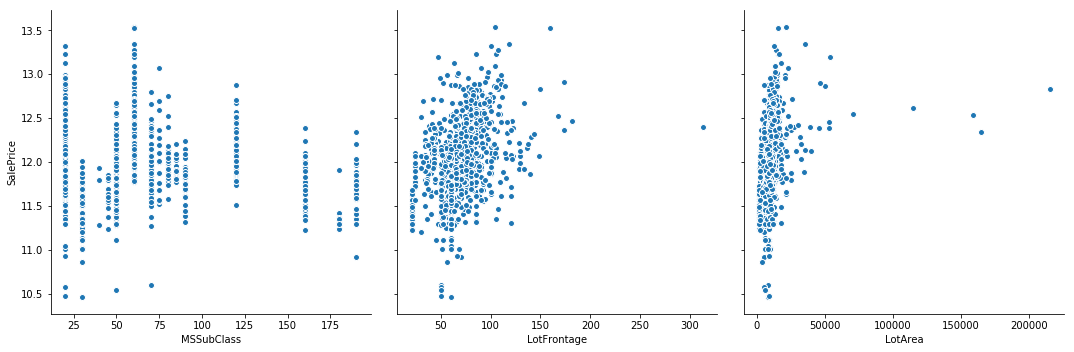

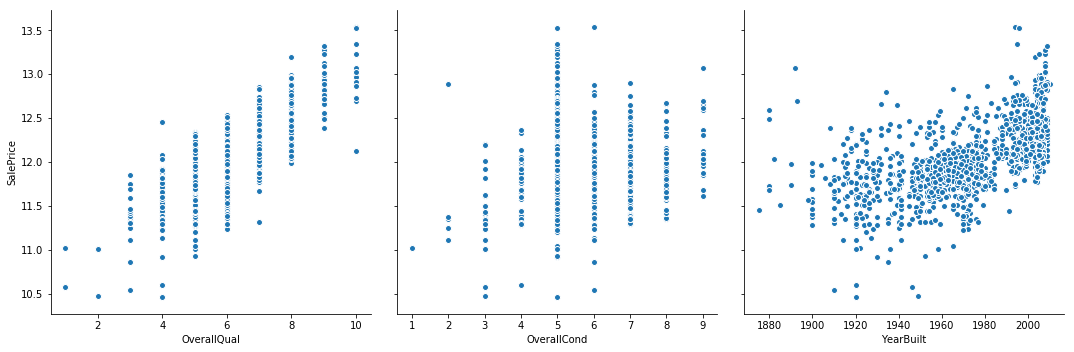

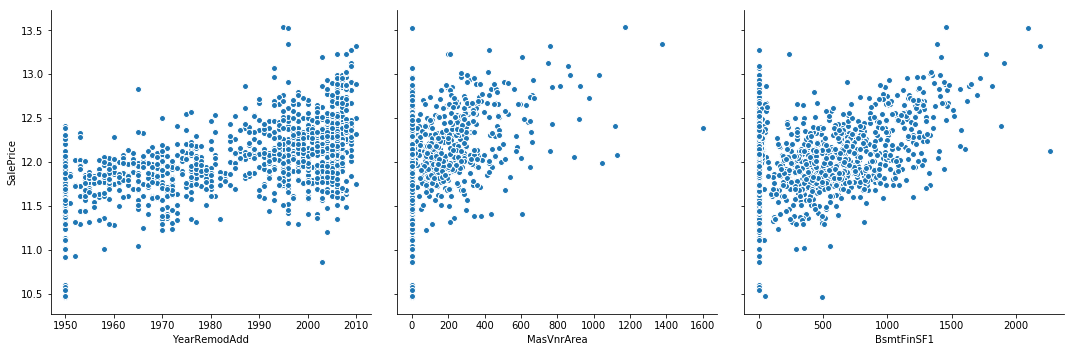

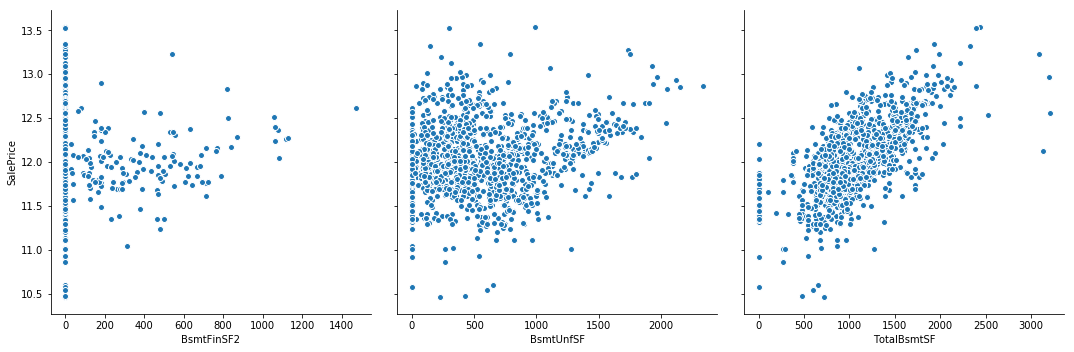

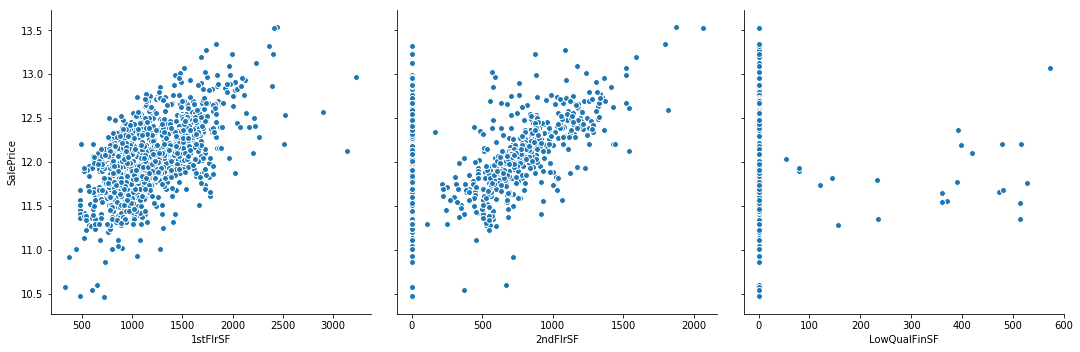

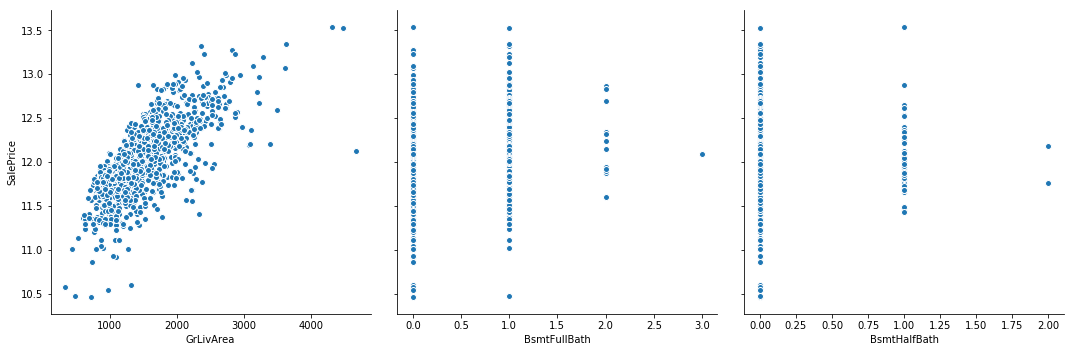

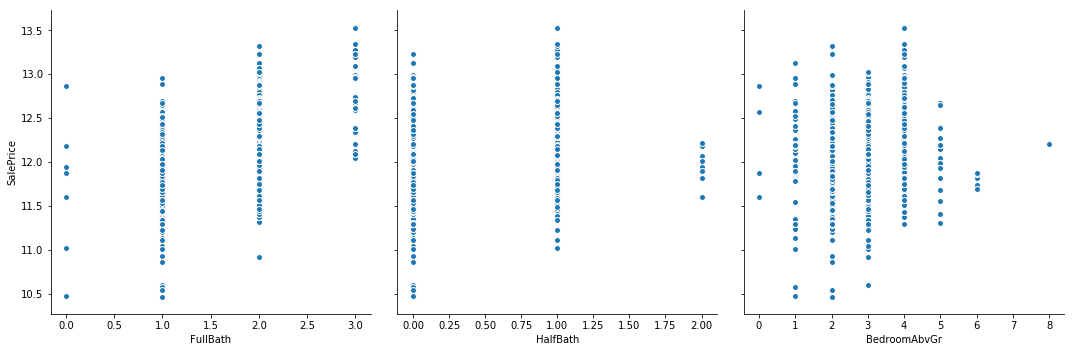

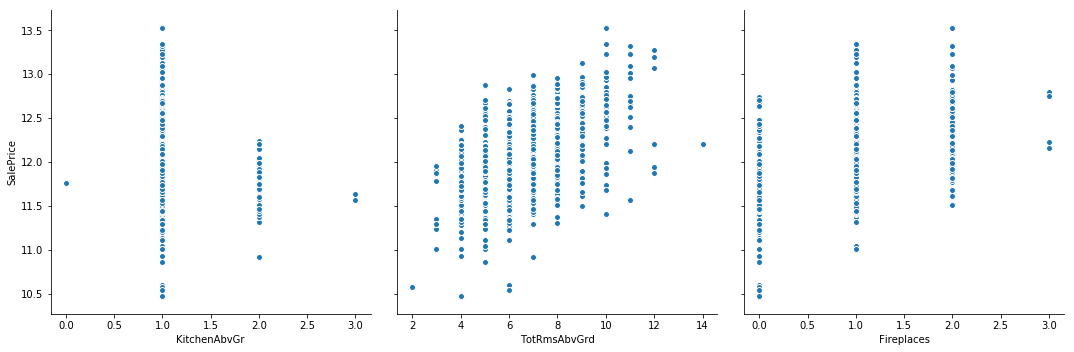

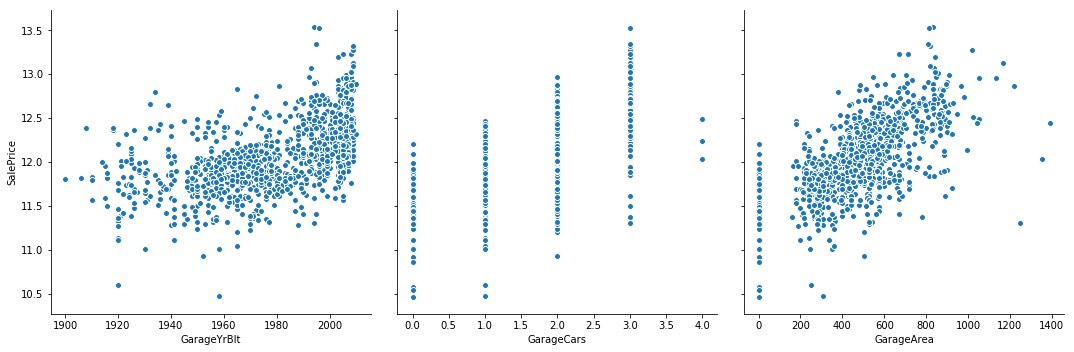

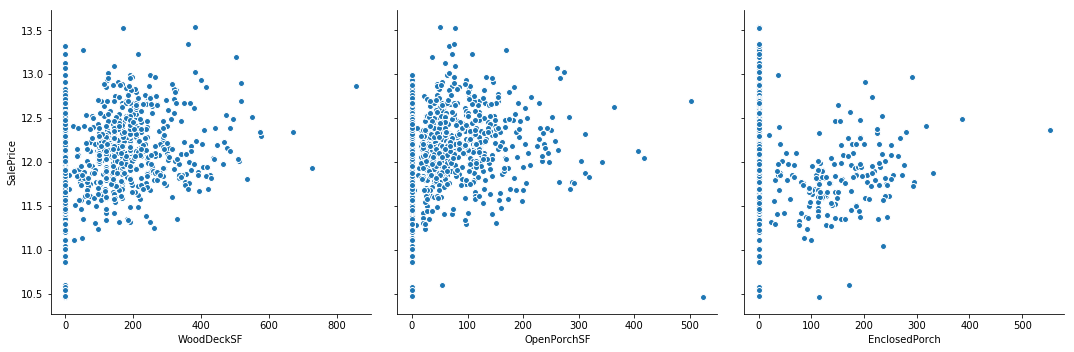

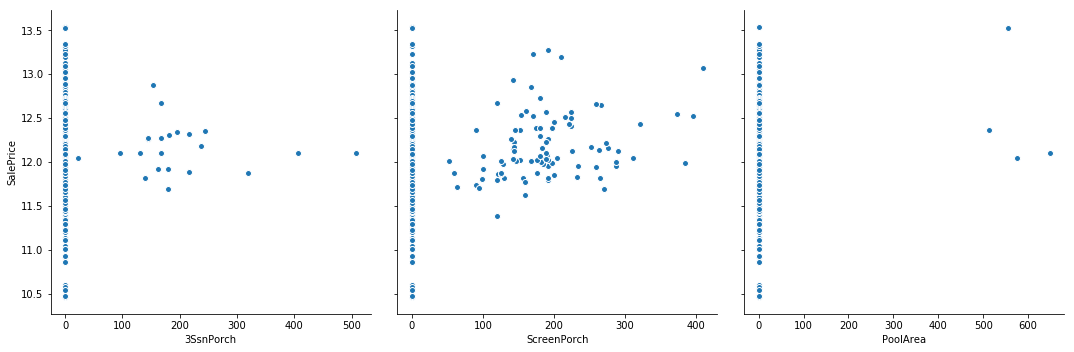

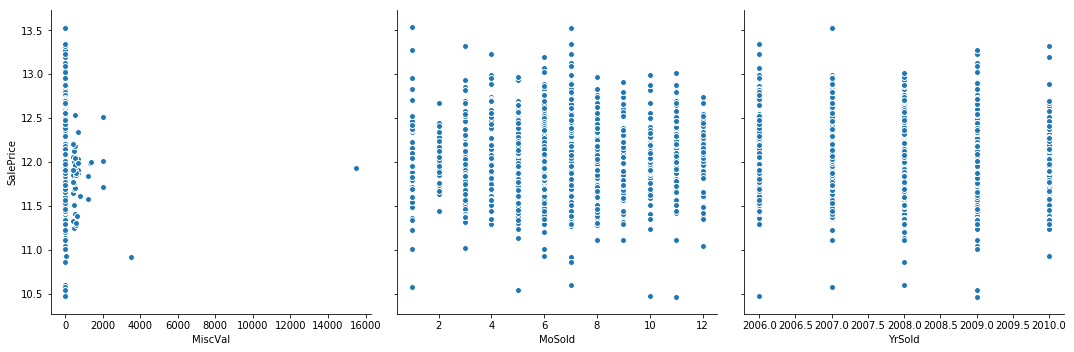

In [25]:
for i in range(0,36,3):
    sns.pairplot(trainDF,x_vars=numericColumns[i:i+3],y_vars=['SalePrice'],size=5)

From these figures, using the linear regression representation, we can see that for some feature like GrLivArea, TotalBsmtSF, 1stFlrSF have some obvious outliers, and for that we choose to remove.

In [5]:
trainDF.drop(trainDF[trainDF["GrLivArea"]>4000].index,inplace=True)
trainDF.drop(trainDF[trainDF["LotFrontage"]>250].index,inplace=True)
trainDF.drop(trainDF[(trainDF['OverallQual']<5) & (trainDF['SalePrice']>200000)].index,inplace=True)

## 2.b. Missing Values

### Numerical missing values :

<div class="alert alert-info">In this we will handle missing data for numerical features.</div>

In [6]:
missing_values = trainDF[numericColumns].columns[trainDF[numericColumns].isnull().any()]
print ("There are  missing values in {0} numerical columns ".format(len(missing_values)))

There are  missing values in 3 numerical columns 


In [7]:
data_missing = trainDF[numericColumns].isnull().sum()
data_missing = data_missing[data_missing > 0]
data_missing.sort_values(inplace=True)
print("Number of missing values by feature:\n",data_missing)

Number of missing values by feature:
 MasVnrArea       6
GarageYrBlt     67
LotFrontage    210
dtype: int64


In [8]:
data_missing = testDF[numericColumns_test].isnull().sum()
data_missing = data_missing[data_missing > 0]
data_missing.sort_values(inplace=True)
print("Number of missing values by feature:\n",data_missing)

Number of missing values by feature:
 MasVnrArea      2
GarageYrBlt    14
LotFrontage    49
dtype: int64


<div class="alert alert-info">We can see that for both the training set and test set 'MasVnArea','GarageYrBlt', and 'LotFrontage' have mssing values for which we replace by zero in which we think it makes most sense beacuse in case of absence of these variables it means that the house doesn't have these features.<div> 

In [9]:
# handling missing data for training data
trainDF.loc[:, "MasVnrArea"] = trainDF.loc[:, "MasVnrArea"].fillna(0)
trainDF.loc[:, "GarageYrBlt"] = trainDF.loc[:, "MasVnrArea"].fillna(0)
# LotFrontage : NA most likely means no lot frontage
trainDF.loc[:, "LotFrontage"] = trainDF.loc[:, "LotFrontage"].fillna(0)


In [10]:
# handling missing data for test data
testDF.loc[:, "MasVnrArea"] = testDF.loc[:, "MasVnrArea"].fillna(0)
testDF.loc[:, "GarageYrBlt"] = testDF.loc[:, "MasVnrArea"].fillna(0)
# LotFrontage : NA most likely means no lot frontage
testDF.loc[:, "LotFrontage"] = testDF.loc[:, "LotFrontage"].fillna(0)

### Categorical missing values : 

In [11]:
missing_values = trainDF[categoricalCols].columns[trainDF[categoricalCols].isnull().any()]
print ("There are  missing values in {0} categorical dataset ".format(len(missing_values)))

There are  missing values in 15 categorical dataset 


In [12]:
data_missing = trainDF[categoricalCols_test].isnull().sum()
data_missing = data_missing[data_missing > 0]
data_missing.sort_values(inplace=True)
print("Number of missing values by feature:\n",data_missing)

Number of missing values by feature:
 MasVnrType         6
BsmtQual          32
BsmtCond          32
BsmtFinType1      32
BsmtExposure      33
BsmtFinType2      33
GarageType        67
GarageFinish      67
GarageQual        67
GarageCond        67
FireplaceQu      564
Fence            970
Alley           1121
MiscFeature     1149
PoolQC          1193
dtype: int64


In [13]:
data_missing = testDF[categoricalCols_test].isnull().sum()
data_missing = data_missing[data_missing > 0]
data_missing.sort_values(inplace=True)
print("Number of missing values by feature:\n",data_missing)

Number of missing values by feature:
 Electrical        1
MasVnrType        2
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      5
BsmtFinType2      5
GarageType       14
GarageFinish     14
GarageQual       14
GarageCond       14
FireplaceQu     126
Fence           206
Alley           244
MiscFeature     253
PoolQC          257
dtype: int64


<div class="alert alert-info">We can see that we have many missing data that we should fill based on reasoning and not just the mean of the columns so we will fill missing data based on logical reasoning with custom values for both training data and test data.</div>

In [14]:
# Handle missing values for features where median/mean or most common value doesn't make sense for training set

# MasVnrType : NA most likely means no veneer
trainDF.loc[:, "MasVnrType"] = trainDF.loc[:, "MasVnrType"].fillna("None")

# BsmtQual etc : data description says NA for basement features is "no basement"
trainDF.loc[:, "BsmtQual"] = trainDF.loc[:, "BsmtQual"].fillna("No")
trainDF.loc[:, "BsmtCond"] = trainDF.loc[:, "BsmtCond"].fillna("No")
trainDF.loc[:, "BsmtExposure"] = trainDF.loc[:, "BsmtExposure"].fillna("No")
trainDF.loc[:, "BsmtFinType1"] = trainDF.loc[:, "BsmtFinType1"].fillna("No")
trainDF.loc[:, "BsmtFinType2"] = trainDF.loc[:, "BsmtFinType2"].fillna("No")

# GarageType etc : data description says NA for garage features is "no garage"
trainDF.loc[:, "GarageType"] = trainDF.loc[:, "GarageType"].fillna("No")
trainDF.loc[:, "GarageFinish"] = trainDF.loc[:, "GarageFinish"].fillna("No")
trainDF.loc[:, "GarageQual"] = trainDF.loc[:, "GarageQual"].fillna("No")
trainDF.loc[:, "GarageCond"] = trainDF.loc[:, "GarageCond"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
trainDF.loc[:, "FireplaceQu"] = trainDF.loc[:, "FireplaceQu"].fillna("No")

# Fence : data description says NA means "no fence"
trainDF.loc[:, "Fence"] = trainDF.loc[:, "Fence"].fillna("No")

# Alley : data description says NA means "no alley access"
trainDF.loc[:, "Alley"] = trainDF.loc[:, "Alley"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
trainDF.loc[:, "MiscFeature"] = trainDF.loc[:, "MiscFeature"].fillna("No")

# BedroomAbvGr : NA most likely means 0
trainDF.loc[:, "BedroomAbvGr"] = trainDF.loc[:, "BedroomAbvGr"].fillna(0)

#PoolQC : data description says NA means "no pool"
trainDF.loc[:, "PoolQC"] = trainDF.loc[:, "PoolQC"].fillna("No")

In [15]:
# Handle missing values for features where median/mean or most common value doesn't make sense for test set

# Electrical : Since this feature has mostly 'SBrkr', we can set that for the missing value.
testDF.loc[:, "Electrical"] = testDF.loc[:, "Electrical"].fillna("SBrkr")
# MasVnrType : NA most likely means no veneer
testDF.loc[:, "MasVnrType"] = testDF.loc[:, "MasVnrType"].fillna("None")

# BsmtQual etc : data description says NA for basement features is "no basement"
testDF.loc[:, "BsmtQual"] = testDF.loc[:, "BsmtQual"].fillna("No")
testDF.loc[:, "BsmtCond"] = testDF.loc[:, "BsmtCond"].fillna("No")
testDF.loc[:, "BsmtExposure"] = testDF.loc[:, "BsmtExposure"].fillna("No")
testDF.loc[:, "BsmtFinType1"] = testDF.loc[:, "BsmtFinType1"].fillna("No")
testDF.loc[:, "BsmtFinType2"] = testDF.loc[:, "BsmtFinType2"].fillna("No")

# GarageType etc : data description says NA for garage features is "no garage"
testDF.loc[:, "GarageType"] = testDF.loc[:, "GarageType"].fillna("No")
testDF.loc[:, "GarageFinish"] = testDF.loc[:, "GarageFinish"].fillna("No")
testDF.loc[:, "GarageQual"] = testDF.loc[:, "GarageQual"].fillna("No")
testDF.loc[:, "GarageCond"] = testDF.loc[:, "GarageCond"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
testDF.loc[:, "FireplaceQu"] = testDF.loc[:, "FireplaceQu"].fillna("No")

# Fence : data description says NA means "no fence"
testDF.loc[:, "Fence"] = testDF.loc[:, "Fence"].fillna("No")

# Alley : data description says NA means "no alley access"
testDF.loc[:, "Alley"] = testDF.loc[:, "Alley"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
testDF.loc[:, "MiscFeature"] = testDF.loc[:, "MiscFeature"].fillna("No")

# BedroomAbvGr : NA most likely means 0
testDF.loc[:, "BedroomAbvGr"] = testDF.loc[:, "BedroomAbvGr"].fillna(0)

#PoolQC : data description says NA means "no pool"
testDF.loc[:, "PoolQC"] = testDF.loc[:, "PoolQC"].fillna("No")


<div class="alert alert-info">After filling the missing data for both numerical and categorical feautures, we have to check again if we still have mising values in our dataset.<div>

In [16]:
missing_values = trainDF.columns[trainDF.isnull().any()]
print ("There are {0} missing values in the training dataset ".format(len(missing_values)))

There are 0 missing values in the training dataset 


In [17]:
missing_values = testDF.columns[testDF.isnull().any()]
print ("There are {0} missing values in the test dataset ".format(len(missing_values)))

There are 0 missing values in the test dataset 


## 2.e. Feature transformations

In this part we will use all the data, to apply the same transformation on train as well as on test data 

In [18]:
full_data=pd.concat([trainDF,testDF],ignore_index=True)

### Transforming some numerical variables that are really categorical

after plotting the different features in the previous part, we can see that some features that are numerical, shoould really be categorical like MSSubClass,OverallCond,YrSold and MoSold

In [19]:
#MSSubClass=The building class
full_data['MSSubClass'] = full_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
full_data['OverallCond'] = full_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
full_data['YrSold'] = full_data['YrSold'].astype(str)
full_data['MoSold'] = full_data['MoSold'].astype(str)


### Categorical to numercial values 

<div class="alert alert-info">Now we will transform categorical data into numerical data (dummy).</div>

In [20]:
# training set
numericColumns=full_data.select_dtypes(include=[np.number]).columns.tolist() 
categoricalCols=[col for col in full_data.columns if col not in numericColumns]
full_data[categoricalCols]= full_data[categoricalCols].fillna('NA')
full_data=pd.get_dummies(full_data)


<div class="alert alert-info">In this part, we intend to see what are the most important features in our data, for that we will use random forest to select the most important feature.</div>

In [21]:
full_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856,854,0,3,706,0,1,0,150,0,...,1,0,1,1,0,0,0,1,0,0
1,1262,0,0,3,978,0,0,1,284,0,...,1,0,1,1,0,0,1,0,0,0
2,920,866,0,3,486,0,1,0,434,0,...,1,0,1,1,0,0,0,1,0,0
3,961,756,0,3,216,0,1,0,540,272,...,1,0,1,1,0,1,0,0,0,0
4,1145,1053,0,4,655,0,1,0,490,0,...,1,0,1,1,0,0,0,1,0,0


<div class="alert alert-info">After doing the transformations to have an homogenious dataset with all numerical values, we have now 339 features and it was only.
For sure not all feautures are important, that's is why we will apply feature selection method to select only the most important ones.
</div>

### Feature Selection

<div class="alert alert-info">For selecting feauture, we chose to use RandomForestRegressor to get the importance of each 339 feature.</div>

In [22]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
X = full_data[:trainDF.shape[0]].drop(['SalePrice'],axis=1)
Y = full_data['SalePrice'].iloc[:trainDF.shape[0]]
rf = RandomForestRegressor()
rf.fit(X, Y)

FI=pd.DataFrame({"FI":rf.feature_importances_},index=X.columns)

FI.describe()

,FI
count,338.000000
mean,0.002959
std,0.029699
min,0.000000
25%,0.000005
50%,0.000101
75%,0.000406
max,0.528743


We can see that we have features with importance 0 or too close close to 0, so keeping them won't be a good idea.

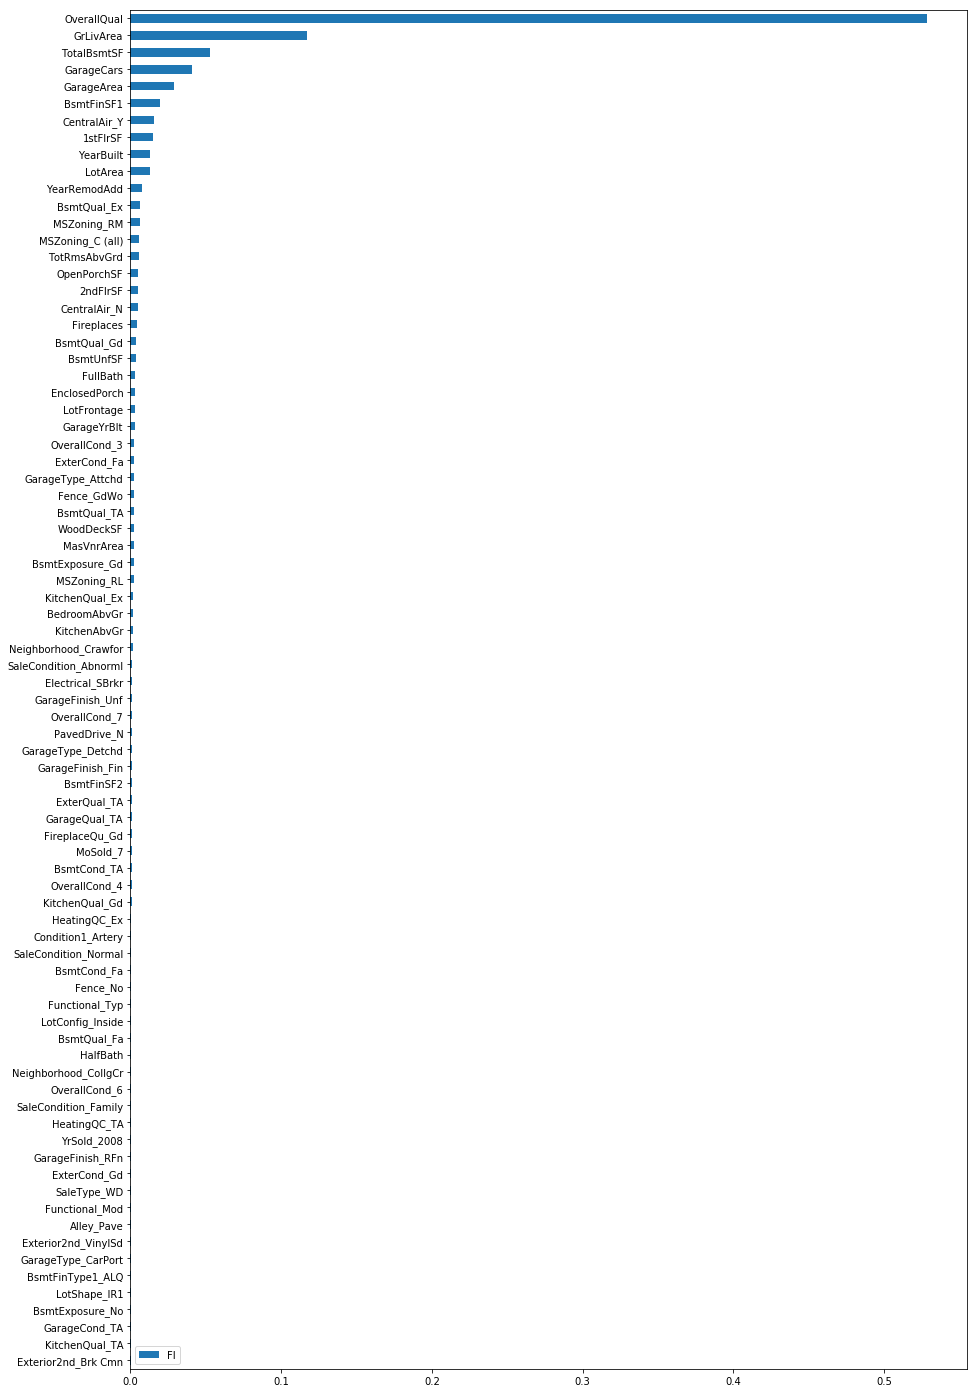

In [23]:
FI.sort_values("FI").iloc[-80:,:].plot(kind="barh",figsize=(15,25))

We are removing 25 % of the features that have low importance.

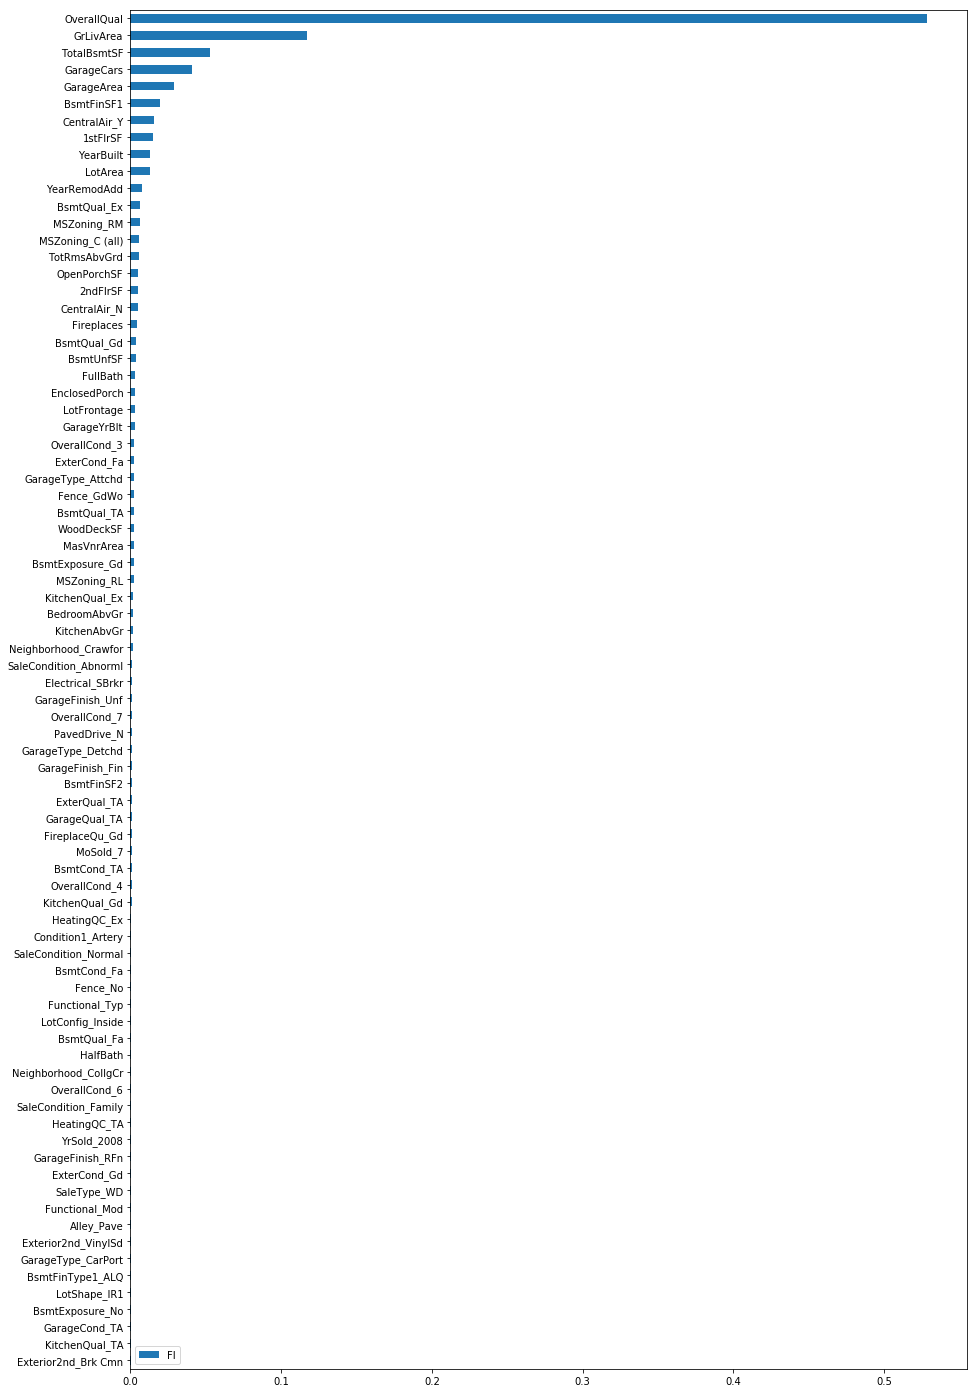

In [24]:
FI= FI[FI.values>0.000005]
FI.sort_values("FI").iloc[-80:,:].plot(kind="barh",figsize=(15,25))


In [25]:
full_data= full_data[FI.index]
full_data["SalePrice"]= Y
FI.describe()

,FI
count,252.000000
mean,0.003968
std,0.034354
min,0.000005
25%,0.000066
50%,0.000235
75%,0.000587
max,0.528743


In [26]:
full_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_COD,SaleType_New,SaleType_WD,Street_Pave,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,856,854,0,3,706,0,1,0,150,0,...,0,0,1,1,0,0,1,0,0,12.247699
1,1262,0,0,3,978,0,0,1,284,0,...,0,0,1,1,0,1,0,0,0,12.109016
2,920,866,0,3,486,0,1,0,434,0,...,0,0,1,1,0,0,1,0,0,12.317171
3,961,756,0,3,216,0,1,0,540,272,...,0,0,1,1,1,0,0,0,0,11.849405
4,1145,1053,0,4,655,0,1,0,490,0,...,0,0,1,1,0,0,1,0,0,12.429220


### Skew tranformations

<div class="alert alert-info">Here we will transofrm skewed numerical data into normal distribution by log transformation.</div>

The figures above shows a few feauture where their distribution have more weight in the left tail of the distribution, and for that we will try to apply logarithmic transmormation in onrder to get "normal" distribututions, where we decided the threahold of the skeness value should be more than 0.75.

In [27]:
#log transform skewed numeric features:
from scipy.stats import skew

numericColumns=full_data.select_dtypes(include=[np.number]).columns.tolist() 
# log transformation on training data
skewed_feats = full_data[numericColumns].apply(lambda x: skew(x) )#compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
full_data[skewed_feats] = np.log1p(full_data[skewed_feats])


<div class="alert alert-info">Now that we 'cleaned' our data we will apply we will start bulding our model.</div>

# 3. Building the statical model

In [28]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression,  ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


<div class="alert alert-info">The models that we will use might be sensitive to outliers. So, to avoid this problem,we need to make them more robust. For that we use the sklearn's Robustscaler() method

the y_data, the saleprice column already scaled using the logarithm.</div>

In [29]:
full_scaled_data= preprocessing.robust_scale(full_data.drop(['SalePrice'],axis=1))
scale_data=full_scaled_data[:trainDF.shape[0]]
y_data = full_data['SalePrice'][:trainDF.shape[0]]

<div class="alert alert-info">The metric we are using is the logarithmic root mean square error using cross validation.
We have seen that the more folder we are using the less error we are getting.</div> 

In [30]:
def rmse_cv(model,scale_data,y_data):
    rmse= np.sqrt(-cross_val_score(model, scale_data,y_data, scoring="neg_mean_squared_error", cv = 10))
    
    return(rmse)


As for models, we have chosen some regression models that can deal with ‘large’ number of features and which also makes use of regularization.
* Rigde Model
* Kernel Ridge Model
* Lasso Model
* ElasticNet Model
* Gradient Boosting Regressor
* XGB Regressor
* Lightgbm Model
* Gaussian Process


### Rigde Model

<div class="alert alert-info">Ridge regression is an extension for linear regression. It’s basically a regularized linear regression model.
Ridge regression belongs a class of regression tools that use L2 regularization: It adds an L2 penalty, which equals the square of the magnitude of coefficients. 
Minimization objective = LS Obj + α * (sum of square of coefficients)
where ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.
</div>

In [33]:
alpha = [0.3, 1, 3,4, 5,8,10, 15,17,20,25, 30]
params = {'alpha':alpha 
         }

X_train, X_test, y_train, y_test = train_test_split(scale_data, y_data, test_size=0.33)

ridge = Ridge()

Ridge_model = GridSearchCV(ridge, params, n_jobs=1,  cv=10,return_train_score=True)  
Ridge_model.fit(X_train,y_train)  
y_predicted_ridge = Ridge_model.predict(scale_data)
rmse=rmse_cv(Ridge_model,scale_data,y_data);
print("mean rmse :",np.mean(rmse),"-- standard deviation: ",np.std(rmse))

Ridge_model.best_estimator_


mean rmse : 0.11200599468251785 -- standard deviation:  0.013917017563168831


Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

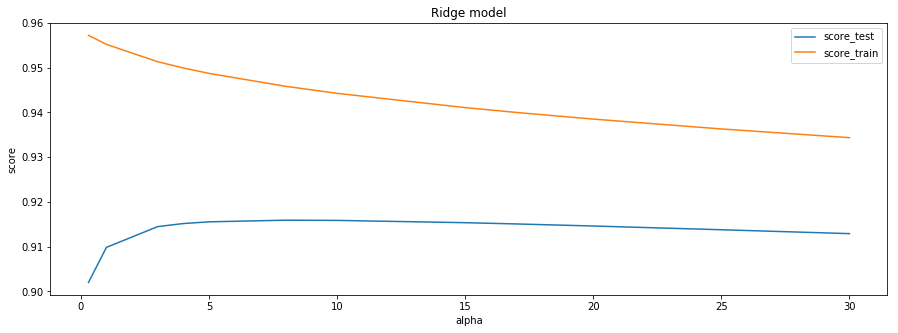

In [210]:
score_train= pd.DataFrame(Ridge_model.cv_results_)['mean_train_score']
score_test= pd.DataFrame(Ridge_model.cv_results_)['mean_test_score']
plt.figure(figsize=(15, 5))
plt.plot(alpha,score_test,label='score_test')
plt.plot(alpha,score_train,label='score_train')
plt.title('Ridge model')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()


<div class="alert alert-info">In the graph above we can see that as we increase alpha the score on the test data increases.</div>

### Kernel Ridge

In [71]:
alpha = [0.1,0.15, 0.2,0.25,0.3,0.5,0.7,1,2,5,10]
params = {'alpha':alpha, 
         }

X_train, X_test, y_train, y_test = train_test_split(scale_data, y_data, test_size=0.33)

Kridge = KernelRidge(kernel='polynomial',degree=2,coef0=2)

KernelRidge_model = GridSearchCV(Kridge, params, n_jobs=1,  cv=10,return_train_score=True)  
KernelRidge_model.fit(X_train,y_train)    
y_predicted_kernel = KernelRidge_model.predict(scale_data)
rmse_KR=rmse_cv(KernelRidge_model,scale_data,y_data);
print("mean rmse :",np.mean(rmse_KR),"-- standard deviation: ",np.std(rmse_KR))
KernelRidge_model.best_estimator_

mean rmse : 0.11141382856970727 -- standard deviation:  0.01422544856907668


KernelRidge(alpha=0.25, coef0=2, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

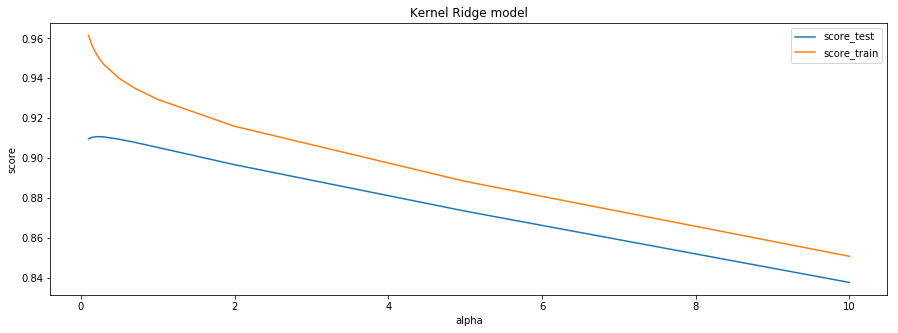

In [72]:
score_train= pd.DataFrame(KernelRidge_model.cv_results_)['mean_train_score']
score_test= pd.DataFrame(KernelRidge_model.cv_results_)['mean_test_score']
plt.figure(figsize=(15, 5))
plt.plot(alpha,score_test,label='score_test')
plt.plot(alpha,score_train,label='score_train')
plt.title('Kernel Ridge model')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()


### Lasso Model 

<div class="alert alert-info">Lasso is another extension built on regularized linear regression L1, but with a small twist. 
 If there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others. </div>


In [73]:

alpha = [0.0004,0.0005,0.0001,0.005,0.05, 0.01,0.1, 0.3]
params = {'alpha':alpha,
              
         }

X_train, X_test, y_train, y_test = train_test_split(scale_data, y_data, test_size=0.33)

Lasso_m = Lasso()
Lasso_model = GridSearchCV(Lasso_m, params, n_jobs=1,  cv=10,return_train_score=True)  
Lasso_model.fit(X_train,y_train)
y_predicted_lasso= Lasso_model.predict(scale_data)
rmse_KR=rmse_cv(Lasso_model,scale_data,y_data);
print("mean rmse :",np.mean(rmse_KR),"-- standard deviation: ",np.std(rmse_KR))

Lasso_model.best_estimator_

mean rmse : 0.11035617119791781 -- standard deviation:  0.01409463452989215


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

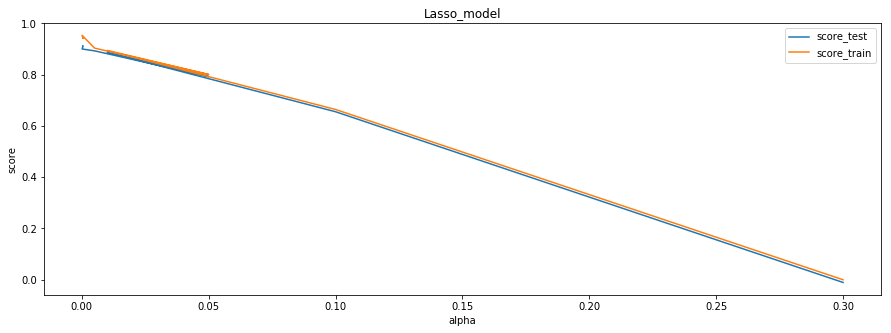

In [74]:
score_train= pd.DataFrame(Lasso_model.cv_results_)['mean_train_score']
score_test= pd.DataFrame(Lasso_model.cv_results_)['mean_test_score']

plt.figure(figsize=(15, 5))
plt.plot(alpha,score_test,label='score_test')
plt.plot(alpha,score_train,label='score_train')
plt.title('Lasso_model')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()


<div class="alert alert-info">We can see here as alpha increases the score of the predictor decreases.</div>

### ElasticNet Model

the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods

In [75]:
alpha = [0.0005,0.0001,0.005,0.05, 0.01,0.1, 0.3]
params = {'alpha':alpha,
              'l1_ratio':[0.7,0.8,1]
         }

X_train, X_test, y_train, y_test = train_test_split(scale_data, y_data, test_size=0.33)

enet = ElasticNet()
Enet_model = GridSearchCV(enet, params, n_jobs=1,  cv=10,return_train_score=True)  
Enet_model.fit(X_train,y_train) 

y_predicted_enet = Enet_model.predict(scale_data)
rmse_ENT=rmse_cv(Enet_model,scale_data,y_data);
print("mean rmse :",np.mean(rmse_ENT),"-- standard deviation: ",np.std(rmse_ENT))


Enet_model.best_estimator_

mean rmse : 0.11030249187211168 -- standard deviation:  0.014150740479748854


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5,1,'Enet')

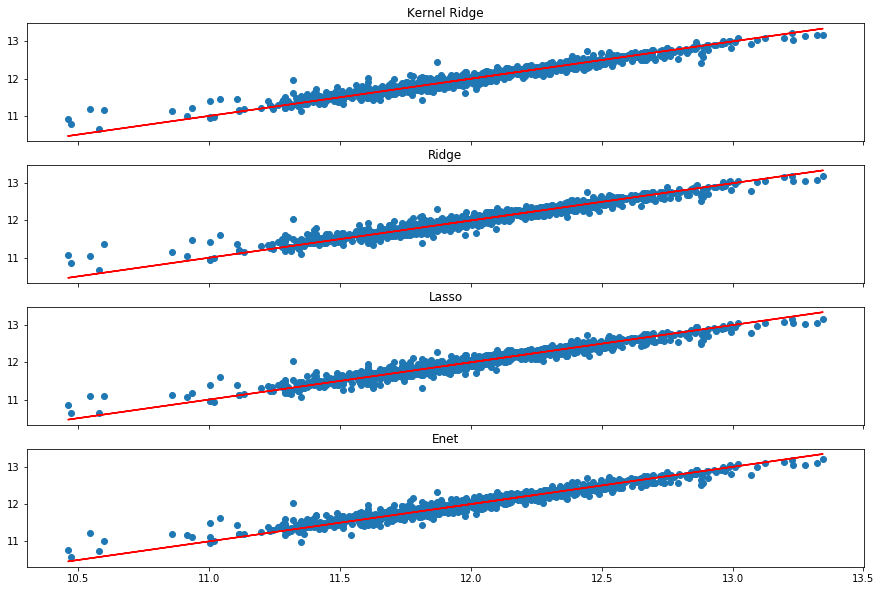

In [76]:

f, axarr = plt.subplots(4, figsize=(15, 10),sharex=True)

axarr[0].scatter(y_data, y_predicted_kernel)
axarr[0].plot(y_data,y_data,'r')
axarr[0].set_title('Kernel Ridge')
axarr[1].scatter(y_data, y_predicted_ridge)
axarr[1].plot(y_data,y_data,'r')
axarr[1].set_title('Ridge')
axarr[2].scatter(y_data, y_predicted_lasso)
axarr[2].plot(y_data,y_data,'r')
axarr[2].set_title('Lasso')
axarr[3].scatter(y_data, y_predicted_enet)
axarr[3].plot(y_data,y_data,'r')
axarr[3].set_title('Enet')


## Advanced Regression techniques

In this section, we tried to use more advanced techniques Gradient Boosting Regressor, Extreme Gradient Boosting (based on tree ensembles) and light GBM.

Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy.
XGB is an advanced implementation of gradient boosting algorithm, is also known as ‘regularized boosting‘ technique because it implements regularization, therefore it also helps to reduce overfitting.

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm. It is faster than XGB and is a much better approach when dealing with large datasets.



### Gradient Boosting Regressor

In [77]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GboostRMSE=rmse_cv(GBoost,scale_data,y_data)
print("the error is :",np.mean(GboostRMSE))
print("the tandard deviation is:",np.std(GboostRMSE))


the error is : 0.11856282384289338
the tandard deviation is: 0.015340718144849769


### XGB Regressor

In [31]:
!pip install xgboost
import xgboost as xgb

    100% |████████████████████████████████| 501kB 1.4MB/s 
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /root/.cache/pip/wheels/4e/6d/1d/0bc23240225fe411315d8abb5d4521b9ff002493ff77515ccc
Successfully built xgboost
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.01, 
                                 learning_rate=0.01, max_depth=6, 
                                 min_child_weight=1.5, n_estimators=7200,
                                 reg_alpha=0.0001, reg_lambda=0.01,
                                 subsample=0.2,seed=42, silent=1,
                                 random_state =7)

rmse_xgb=rmse_cv(model_xgb,scale_data,y_data);
print("mean rmse :",np.mean(rmse_xgb),"-- standard deviation: ",np.std(rmse_xgb))

mean rmse : 0.11450411541924452 -- standard deviation:  0.013883700751603672


### Lightgbm Model

In [80]:
!pip install lightgbm
import lightgbm as lgb

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [81]:
model_lgb=lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

rmse_lgb=rmse_cv(model_lgb,scale_data,y_data);
print("mean rmse :",np.mean(rmse_lgb),"-- standard deviation: ",np.std(rmse_lgb))

mean rmse : 0.11810214430181709 -- standard deviation:  0.014280031680262551


### Gaussian Process

A gaussian process model is a powerful and flexible regression model. We use a Gaussian Process with matern kernel to model the house prices.

In [34]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, Matern, RBF, DotProduct, RationalQuadratic
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

In [39]:
params = {'alpha':[5e-9],          
         }

X_train, X_test, y_train, y_test = train_test_split(scale_data, y_data, test_size=0.33)

kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
gp = GaussianProcessRegressor(kernel=kernel,  optimizer='fmin_l_bfgs_b',alpha=5e-9, 
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=2016)

#gp_model = GridSearchCV(gp, params, n_jobs=1,cv=3)  
#gp_model.fit(X_train,y_train) 
#y_predicted_gp = gp_model.predict(scale_data)
rmse_gp=rmse_cv(gp,scale_data,y_data);
print("mean rmse :",np.mean(rmse_gp),"-- standard deviation: ",np.std(rmse_gp))

#gp_model.best_estimator_

/opt/conda/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]
/opt/conda/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]
/opt/conda/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]
/opt/conda/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]
/opt/conda/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]
/opt/conda/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value

mean rmse : 0.11643268568727327 -- standard deviation:  0.014818661547537717


We can see that with the gaussian process, the error has reduced compared with advanced regression techniques.

# 4. Improving our model

### Averaging the Best models

Here we take the best models obtained above an we put them together where the final prediction is the average value of predictions produced by the choosed models.

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

These are the models that we will consider for avereging the models

In [79]:
lr = Ridge(alpha=15)
lass= Lasso(alpha=0.0004)
ENet= ElasticNet(0.0005, l1_ratio=0.9)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.01, 
                                 learning_rate=0.01, max_depth=6, 
                                 min_child_weight=1.5, n_estimators=7200,
                                 reg_alpha=0.0001, reg_lambda=0.01,
                                 subsample=0.2,seed=42, silent=1,
                                 random_state =7)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
KRR = KernelRidge(alpha=0.15,kernel='polynomial',degree=2,coef0=2.5)

kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
Gaussian= GaussianProcessRegressor(kernel=kernel,  optimizer='fmin_l_bfgs_b',alpha=5e-9, 
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=2016)


In [66]:
averaged_models = AveragingModels(models = (lr, lass, ENet, model_xgb,GBoost))
rmse_averaged_models=rmse_cv(averaged_models,scale_data,y_data);
print("mean rmse :",np.mean(rmse_averaged_models),"-- standard deviation: ",np.std(rmse_averaged_models))


mean rmse : 0.10944961614761135 -- standard deviation:  0.014719924670347086


### Stacking Averaged Models

<div class="alert alert-info">This is similar to what we have done before but it is more advanced. The training is devided into 2 levels: in the first level we choose as before some models called base models then we decompose our data into folds and train the models on all folds and make predictions on the remaining fold (heldout data). Then we average the predictions of these models getting one vector containing the averaged predictions of all level 1 models. In level 2 we choose one model called the meta model where we use this model to train on the level 1 predictions and the resulted predictions are called level 2 predictions and these predictions are the final results. The following procedure can be explained in this photo.
</div><br>


<img src="https://burakhimmetoglu.files.wordpress.com/2016/12/workflow.png?w=1140" />

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, lass,model_xgb), meta_model =KRR)
rmse_s_a_m=rmse_cv(stacked_averaged_models,scale_data,np.array(y_data));
print("mean rmse :",np.mean(rmse_s_a_m),"-- standard deviation: ",np.std(rmse_s_a_m))

# 5. Predicting Sale Price and Submission

<div class="alert alert-info">After doing the training using different models and comparing the models used, In this final prediction, we tried to combine stacking as well as Averaging to get better result
So we did the stacking for Elastic Net, lasso, XGb as base models and Gboost as meta_model. 
And then we tried to get the average using this last stacking model with xgb and Gboost.</div>

In [45]:
stacked_averaged_model1 = StackingAveragedModels(base_models = (ENet, lass,model_xgb), meta_model = GBoost)
main_averaging_model=AveragingModels(models=(stacked_averaged_model1,model_xgb,GBoost))
averaged_models=[main_averaging_model]
for model in averaged_models:
    model.fit(scale_data,np.array(y_data))
    testDF= full_scaled_data[trainDF.shape[0]:]
    pred=np.expm1(model.predict(testDF))
   

In [75]:
testDF= full_scaled_data[trainDF.shape[0]:]
test = pd.read_csv('test.csv')
ID=test['Id']
result=pd.DataFrame({'Id':ID,'SalePrice':pred})
result.to_csv("submission.csv",index=False)